# Healthcare Dataset Challenge
## Problem Statement

Based on the given dataset containing clinical and financial information of patients hospitalised for certain conditions. The task is to analyze data of patients hospitalized. The data given in different tables will be joined together to find insights about the drivers of cost of care. 

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [72]:
df_billamt = pd.read_csv('bill_amount.csv')

In [73]:
df_billid = pd.read_csv('bill_id.csv')

In [74]:
df_billmerged = pd.merge(df_billamt,df_billid, on="bill_id")
df_billmerged.head()

,bill_id,amount,patient_id,date_of_admission
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22
1,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28
2,1148334643,6469.605351,1ce104904e9160cf3cfdb3c45b9ce4ff,2014-01-16
3,3818426276,755.965425,afdfe7216d84e13708a19cbca288379a,2013-01-22
4,9833541918,897.347816,b9a0c119dc07e07f88281964f3a4869f,2011-04-22


In [75]:
df_billmerged.shape

(13600, 4)

In [76]:
df_clinical = pd.read_csv('clinical_data.csv')
df_clinical.head()

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


In [77]:
df_clinical['id'].count()

3400

In [78]:
df_clinical.rename(columns={"id": "patient_id"}, inplace=True)

In [79]:
df_mergeclinical = pd.merge(df_billmerged,df_clinical,on=['patient_id','date_of_admission'], how='inner')
df_mergeclinical.head()

,bill_id,amount,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
1,7040712549,27923.446312,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
2,1314727123,1952.978141,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
3,1029762870,1244.994422,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0.0,0,0,0.0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.6,31.8,98.0,65.1,166.0
4,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,2014-10-11,0,0.0,0,0,0.0,0,0,1,1,0,1,1,1,1,1,0,1,0,16.3,29.1,94.0,72.5,162.0


In [80]:
df_mergeclinical.isnull().sum()

bill_id                  0
amount                   0
patient_id               0
date_of_admission        0
date_of_discharge        0
medical_history_1        0
medical_history_2      932
medical_history_3        0
medical_history_4        0
medical_history_5     1216
medical_history_6        0
medical_history_7        0
preop_medication_1       0
preop_medication_2       0
preop_medication_3       0
preop_medication_4       0
preop_medication_5       0
preop_medication_6       0
symptom_1                0
symptom_2                0
symptom_3                0
symptom_4                0
symptom_5                0
lab_result_1             0
lab_result_2             0
lab_result_3             0
weight                   0
height                   0
dtype: int64

In [81]:
df_demo = pd.read_csv('demographics.csv')
df_demo.head()

,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12


In [82]:
df_all = pd.merge(df_demo,df_mergeclinical,on=['patient_id'])
df_all

,patient_id,gender,race,resident_status,date_of_birth,bill_id,amount,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,3065454316,1546.325288,2014-09-20,2014-10-04,0,0.0,0,0,0.0,0,1,1,0,1,0,1,1,1,1,0,0,1,14.2,27.0,81.0,68.1,161.0
1,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,6620751760,1324.103110,2014-09-20,2014-10-04,0,0.0,0,0,0.0,0,1,1,0,1,0,1,1,1,1,0,0,1,14.2,27.0,81.0,68.1,161.0
2,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,3681463207,16079.726035,2014-09-20,2014-10-04,0,0.0,0,0,0.0,0,1,1,0,1,0,1,1,1,1,0,0,1,14.2,27.0,81.0,68.1,161.0
3,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,9275762695,614.011832,2014-09-20,2014-10-04,0,0.0,0,0,0.0,0,1,1,0,1,0,1,1,1,1,0,0,1,14.2,27.0,81.0,68.1,161.0
4,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18,7966721986,530.811883,2014-08-08,2014-08-18,0,0.0,No,0,NaN,0,1,0,0,0,1,1,1,1,1,1,1,1,14.3,27.2,92.0,76.5,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,c5ca8e8bfd744a1ef6f77318bcb591b4,Female,Chinese,Singaporean,1973-04-19,5772435291,414.021131,2011-09-02,2011-09-11,1,1.0,0,0,0.0,0,0,1,0,1,0,1,1,1,1,1,1,1,13.2,27.7,103.0,94.4,159.0
13596,20b609609d4dbb834d722ddf29f18879,Male,Chinese,Singaporean,1986-09-04,2243410406,920.350540,2015-06-19,2015-07-03,0,0.0,No,0,0.0,0,0,0,1,1,0,1,1,0,0,1,1,1,18.4,25.9,111.0,87.1,167.0
13597,20b609609d4dbb834d722ddf29f18879,Male,Chinese,Singaporean,1986-09-04,1873862440,12481.778272,2015-06-19,2015-07-03,0,0.0,No,0,0.0,0,0,0,1,1,0,1,1,0,0,1,1,1,18.4,25.9,111.0,87.1,167.0
13598,20b609609d4dbb834d722ddf29f18879,Male,Chinese,Singaporean,1986-09-04,4349734739,806.323657,2015-06-19,2015-07-03,0,0.0,No,0,0.0,0,0,0,1,1,0,1,1,0,0,1,1,1,18.4,25.9,111.0,87.1,167.0


In [83]:
df_all.describe()

,bill_id,amount,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
count,1.360000e+04,13600.000000,13600.000000,12668.000000,13600.000000,12384.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000
mean,5.007147e+09,5464.767783,0.169118,0.311336,0.052059,0.063953,0.254706,0.254412,0.503824,0.591176,0.820882,0.523235,0.819706,0.744118,0.619706,0.662353,0.544706,0.726471,0.526765,14.469882,27.431529,99.489706,78.748441,165.084412
std,2.885919e+09,7717.479509,0.374870,0.463058,0.222154,0.244680,0.435712,0.435546,0.500004,0.491635,0.383465,0.499478,0.384446,0.436372,0.485477,0.472925,0.498016,0.445787,0.499301,1.747130,2.463572,15.252770,10.973866,6.972908
min,5.584120e+05,79.496707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,52.000000,48.000000,151.000000
25%,2.485853e+09,950.689008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,25.800000,88.000000,71.200000,160.000000
50%,4.992958e+09,1516.951136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.500000,27.400000,100.000000,78.900000,165.000000
75%,7.524563e+09,7307.056573,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.800000,29.100000,110.000000,86.300000,170.000000
max,9.999633e+09,81849.751340,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.300000,35.100000,150.000000,121.000000,186.000000


In [84]:
df_all.dropna(inplace=True)
df_all.shape

(11592, 32)

In [85]:
df_all.isnull().sum()

patient_id            0
gender                0
race                  0
resident_status       0
date_of_birth         0
bill_id               0
amount                0
date_of_admission     0
date_of_discharge     0
medical_history_1     0
medical_history_2     0
medical_history_3     0
medical_history_4     0
medical_history_5     0
medical_history_6     0
medical_history_7     0
preop_medication_1    0
preop_medication_2    0
preop_medication_3    0
preop_medication_4    0
preop_medication_5    0
preop_medication_6    0
symptom_1             0
symptom_2             0
symptom_3             0
symptom_4             0
symptom_5             0
lab_result_1          0
lab_result_2          0
lab_result_3          0
weight                0
height                0
dtype: int64

In [86]:
df_all['patient_id'].nunique()

2608

# Combine rows for bills for the same hospitalisation period

In [87]:
# combine rows with the same patient, date_of admission and discharge date and sum up the amount for that particular hospital stay.
df_all2 = df_all.groupby(['patient_id', 'date_of_admission', 'date_of_discharge'])
df_all2 = df_all2.agg({'patient_id':'first', 'gender':'first', 'race':'first', 'resident_status':'first',
'date_of_birth':'first', 'bill_id':'first', 'amount':'sum','date_of_admission':'first',
 'date_of_discharge':'first','medical_history_1':'first','medical_history_2':'first',
 'medical_history_3':'first',
 'medical_history_4':'first',
 'medical_history_5':'first',
 'medical_history_6':'first',
 'medical_history_7':'first',
 'preop_medication_1':'first',
 'preop_medication_2':'first',
 'preop_medication_3':'first',
 'preop_medication_4':'first',
 'preop_medication_5':'first',
 'preop_medication_6':'first',
 'symptom_1':'first',
 'symptom_2':'first',
 'symptom_3':'first',
 'symptom_4':'first',
 'symptom_5':'first',
 'lab_result_1':'first',
 'lab_result_2':'first',
 'lab_result_3':'first',
 'weight':'first',
 'height':'first'}).reset_index(drop=True)
df_all2

,patient_id,gender,race,resident_status,date_of_birth,bill_id,amount,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,00225710a878eff524a1d13be817e8e2,Female,Chinese,Singaporean,1983-01-16,4692776325,5190.566695,2014-04-10,2014-04-22,0,0.0,0,0,0.0,0,1,0,0,0,1,0,0,0,0,1,0,0,13.4,27.9,96.0,66.9,155.0
1,0029d90eb654699c18001c17efb0f129,Female,Chinese,Singaporean,1943-10-14,645202091,22601.497872,2012-11-07,2012-11-20,0,1.0,0,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,1,16.7,26.5,109.0,89.1,160.0
2,0040333abd68527ecb53e1db9073f52e,Male,India,Singaporean,1972-08-26,8199801360,17447.181635,2013-01-19,2013-01-31,0,1.0,0,0,0.0,0,1,0,0,1,1,1,0,0,1,0,0,1,14.8,25.2,96.0,79.5,172.0
3,00473b58e3dc8ae37b3cb34069705083,Female,Chinese,Singapore citizen,1976-07-23,3108812506,15285.883220,2014-02-10,2014-02-15,1,0.0,0,0,0.0,0,0,0,0,1,1,1,0,0,1,1,1,0,14.9,28.7,122.0,81.1,160.0
4,0078662d1d983dde68ea057c42d5b5cf,Male,Malay,Foreigner,1942-10-19,7289756776,73477.869010,2012-04-28,2012-05-10,0,1.0,No,0,0.0,1,0,1,0,1,1,1,0,0,1,0,1,1,14.2,27.2,89.0,74.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,ffa5a615a4cc5fb1ada0443edc1f5dd3,Female,India,Singapore citizen,1976-08-07,9308767013,4676.066179,2011-04-24,2011-05-04,0,1.0,0,0,0.0,0,1,0,0,1,0,1,0,0,0,0,0,0,16.3,27.4,86.0,69.3,162.0
2894,ffac3c4b6838f42625e1dd00dd7c867b,Male,Chinese,Singaporean,1963-10-07,459712708,14049.042774,2015-11-28,2015-12-07,0,0.0,0,0,0.0,0,0,1,1,1,1,1,1,1,1,0,1,0,16.0,26.7,121.0,99.6,178.0
2895,ffc19537fa6621512ef4f296d60896ce,Male,Chinese,PR,1938-09-12,5687796410,30053.620971,2013-05-05,2013-05-15,0,1.0,0,0,1.0,0,0,1,1,1,1,1,1,0,0,1,1,1,16.7,30.1,107.0,83.1,170.0
2896,ffd67c2bcfb32508d2cf7b1e1193e2ed,Male,Malay,Singaporean,1950-06-06,2161861615,28007.636468,2012-12-24,2013-01-01,0,0.0,0,0,0.0,0,0,1,1,1,1,1,0,1,1,1,1,0,16.4,33.6,96.0,81.3,161.0


In [88]:
print("unique values in each column\n",df_all2.nunique())

unique values in each column
 patient_id            2608
gender                   4
race                     6
resident_status          4
date_of_birth         2406
bill_id               2898
amount                2898
date_of_admission     1367
date_of_discharge     1443
medical_history_1        2
medical_history_2        2
medical_history_3        4
medical_history_4        2
medical_history_5        2
medical_history_6        2
medical_history_7        2
preop_medication_1       2
preop_medication_2       2
preop_medication_3       2
preop_medication_4       2
preop_medication_5       2
preop_medication_6       2
symptom_1                2
symptom_2                2
symptom_3                2
symptom_4                2
symptom_5                2
lab_result_1            97
lab_result_2           144
lab_result_3            89
weight                 509
height                  35
dtype: int64


From this we are able to see that the gender, race, resident status, medical history 3 might have additional values and the format might not be standardised.

In [89]:
print(df_all2['gender'].unique())
print(df_all2['race'].unique())
print(df_all2['resident_status'].unique())
print(df_all2['medical_history_3'].unique())

['Female' 'Male' 'm' 'f']
['Chinese' 'India' 'Malay' 'Others' 'Indian' 'chinese']
['Singaporean' 'Singapore citizen' 'Foreigner' 'PR']
['0' 'No' '1' 'Yes']


```
In the dataset the values are not consistent, hence we will be transforming them eg.
Gender: m and Male means the same
```



In [90]:
#functions to transform column values
def gender(gender):
  if gender == 'm':
    return 'Male'
  elif gender == 'f':
    return 'Female'
  else:
    return gender

def race(race):
  if race == 'India':
    return 'Indian'
  if race == 'chinese':
    return 'Chinese'
  else:
    return race

def status(resident_status):
  if resident_status == 'Singapore citizen':
    return 'Singaporean'
  else:
    return resident_status

def medical_history_3(mh3):
  if mh3 == 'No':
    return '0'
  if mh3 == 'Yes':
    return '1'
  else:
    return mh3

#dob to age
from datetime import datetime, date
def age(dob):
  today = date.today()
  dob = datetime.strptime(dob, "%Y-%m-%d").date() 
  age = today.year - dob.year - ((today.month,today.day) < (dob.month,dob.day))
  return age

In [91]:
df_all2['gender'] = df_all2['gender'].apply(gender)
df_all2['race'] = df_all2['race'].apply(race)
df_all2['resident_status'] = df_all2['resident_status'].apply(status)
df_all2['medical_history_3'] = df_all2['medical_history_3'].apply(medical_history_3)
df_all2.head()

,patient_id,gender,race,resident_status,date_of_birth,bill_id,amount,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,00225710a878eff524a1d13be817e8e2,Female,Chinese,Singaporean,1983-01-16,4692776325,5190.566695,2014-04-10,2014-04-22,0,0.0,0,0,0.0,0,1,0,0,0,1,0,0,0,0,1,0,0,13.4,27.9,96.0,66.9,155.0
1,0029d90eb654699c18001c17efb0f129,Female,Chinese,Singaporean,1943-10-14,645202091,22601.497872,2012-11-07,2012-11-20,0,1.0,0,0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,1,16.7,26.5,109.0,89.1,160.0
2,0040333abd68527ecb53e1db9073f52e,Male,Indian,Singaporean,1972-08-26,8199801360,17447.181635,2013-01-19,2013-01-31,0,1.0,0,0,0.0,0,1,0,0,1,1,1,0,0,1,0,0,1,14.8,25.2,96.0,79.5,172.0
3,00473b58e3dc8ae37b3cb34069705083,Female,Chinese,Singaporean,1976-07-23,3108812506,15285.883220,2014-02-10,2014-02-15,1,0.0,0,0,0.0,0,0,0,0,1,1,1,0,0,1,1,1,0,14.9,28.7,122.0,81.1,160.0
4,0078662d1d983dde68ea057c42d5b5cf,Male,Malay,Foreigner,1942-10-19,7289756776,73477.869010,2012-04-28,2012-05-10,0,1.0,0,0,0.0,1,0,1,0,1,1,1,0,0,1,0,1,1,14.2,27.2,89.0,74.7,173.0


In [92]:
df_all2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2898 non-null   object 
 1   gender              2898 non-null   object 
 2   race                2898 non-null   object 
 3   resident_status     2898 non-null   object 
 4   date_of_birth       2898 non-null   object 
 5   bill_id             2898 non-null   int64  
 6   amount              2898 non-null   float64
 7   date_of_admission   2898 non-null   object 
 8   date_of_discharge   2898 non-null   object 
 9   medical_history_1   2898 non-null   int64  
 10  medical_history_2   2898 non-null   float64
 11  medical_history_3   2898 non-null   object 
 12  medical_history_4   2898 non-null   int64  
 13  medical_history_5   2898 non-null   float64
 14  medical_history_6   2898 non-null   int64  
 15  medical_history_7   2898 non-null   int64  
 16  preop_

In [93]:
df_all2['date_of_birth'].astype('object')
df_all2['medical_history_3'].astype('int64')

0       0
1       0
2       0
3       0
4       0
       ..
2893    0
2894    0
2895    0
2896    0
2897    0
Name: medical_history_3, Length: 2898, dtype: int64

In [94]:
df_all2['date_of_birth'] = df_all2['date_of_birth'].apply(age)
df_all2.rename(columns={"date_of_birth": "age"}, inplace=True)

### Let's have a general sense of the distributions in this dataset
### to check for further low variability or extreme skewness

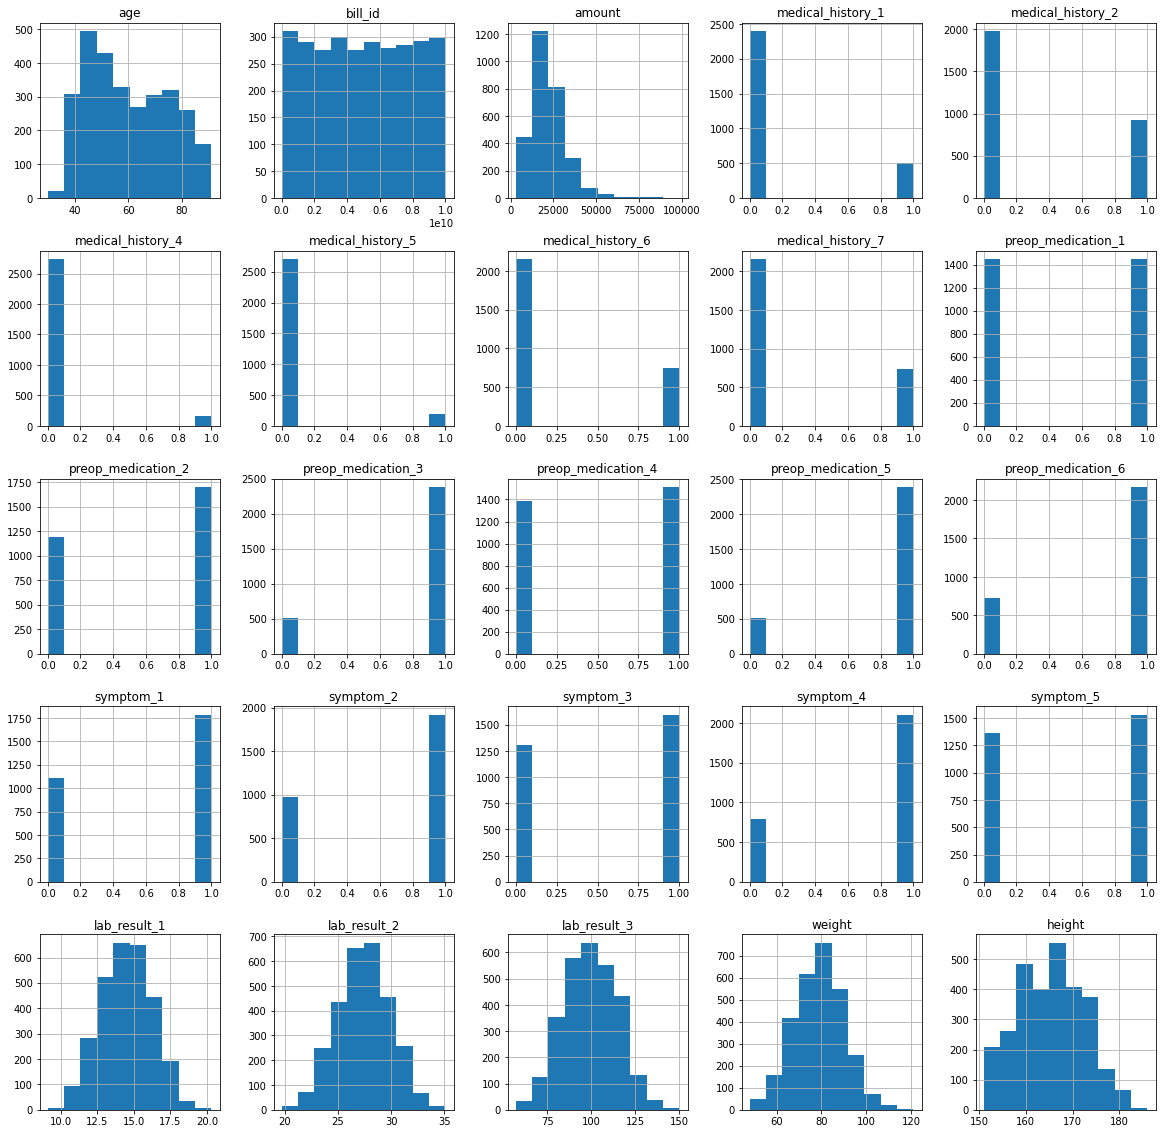

In [95]:
df_all2.hist(figsize = (20,20))
plt.show()

### Most features are normally distributed except the amount column which have some very large values. They will be removed later on.

# Outlier Detection

In [96]:
# get only numerical data
newdf = df_all2.select_dtypes("number")
for feature in newdf:

  Q1 = newdf[feature].quantile(0.25)
  Q3 = newdf[feature].quantile(0.75)
  IQR = Q3-Q1
  lower = Q1- 1.5*IQR
  upper = Q3 + 1.5*IQR
    
  if newdf[(newdf[feature] > upper)].any(axis=None):
    print(feature,"yes")
  else:
    print(feature, "no")### Outlier Detection

age no
bill_id no
amount yes
medical_history_1 yes
medical_history_2 no
medical_history_4 yes
medical_history_5 yes
medical_history_6 no
medical_history_7 no
preop_medication_1 no
preop_medication_2 no
preop_medication_3 no
preop_medication_4 no
preop_medication_5 no
preop_medication_6 no
symptom_1 no
symptom_2 no
symptom_3 no
symptom_4 no
symptom_5 no
lab_result_1 yes
lab_result_2 yes
lab_result_3 yes
weight yes
height no


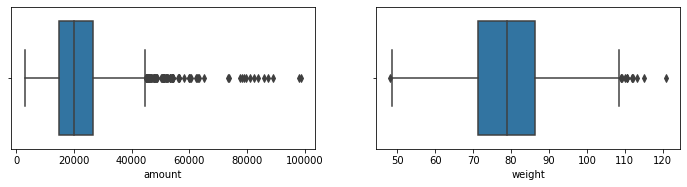

In [97]:
#visualise outliers
figure = plt.figure(figsize=(12, 12))
ax1 = plt.subplot(4,2,1)
sns.boxplot(x = df_all2["amount"], ax=ax1)

ax2 = plt.subplot(4,2,2)
sns.boxplot(x = df_all2["weight"], ax=ax2)

In [98]:
Q1 = df_all2['amount'].quantile(0.25)
print(Q1)
Q3 = df_all2['amount'].quantile(0.75)
print(Q3)
IQR = Q3-Q1
lower = Q1- 1.5*IQR
upper = Q3 + 1.5*IQR 

#get outliers
outside_upper = df_all2['amount'] > upper
outside_lower = df_all2['amount'] < lower
outliers_df = df_all2[outside_upper | outside_lower]
print("number of outliers for 'amount'")
print(len(outliers_df))


14887.2463617865
26810.081562011
number of outliers for 'amount'
84


In [99]:
Q1 = df_all2['weight'].quantile(0.25)
print(Q1)
Q3 = df_all2['weight'].quantile(0.75)
print(Q3)
IQR = Q3-Q1
lower = Q1- 1.5*IQR
upper = Q3 + 1.5*IQR 

#get outliers
outside_upper = df_all2['weight'] > upper
outside_lower = df_all2['weight'] < lower
outliers_df = df_all2[outside_upper | outside_lower]
print("number of outliers for 'weight'")
print(len(outliers_df))

71.3
86.37500000000001
number of outliers for 'weight'
14


In [100]:
Q1 = df_all2['weight'].quantile(0.25)
print(Q1)
Q3 = df_all2['weight'].quantile(0.75)
print(Q3)
IQR = Q3-Q1
lower = Q1- 1.5*IQR
upper = Q3 + 1.5*IQR 

#remove 'weight' outliers
outside_upper = df_all2['weight'] > upper
outside_lower = df_all2['weight'] < lower
df_all2 = df_all2[~(outside_upper | outside_lower)]
df_all2.shape

71.3
86.37500000000001


(2884, 32)

In [101]:
Q1 = df_all2['amount'].quantile(0.25)
print(Q1)
Q3 = df_all2['amount'].quantile(0.75)
print(Q3)
IQR = Q3-Q1
lower = Q1- 1.5*IQR
upper = Q3 + 1.5*IQR 

#remove 'amount' outliers
outside_upper = df_all2['amount'] > upper
outside_lower = df_all2['amount'] < lower
df_all2 = df_all2[~(outside_upper | outside_lower)]
df_all2.shape

14885.7236027905
26796.622448932998


(2800, 32)

#Target Variable Analysis#

Our aim is to find out the drivers of cost. Hence,  a look is taken at the amount of each bill and try to find a relationship between bill amount and other variables. 




In [102]:
fig=px.scatter(df_all2, x="age", y="amount", title='Age vs Amount',hover_data=['patient_id'],trendline="ols")
fig.show()             

In [103]:
fig=px.scatter(df_all2, x="resident_status", y="amount", title='Resident Status vs Amount', hover_data=['patient_id'])
fig.show() 

In [104]:
fig=px.box(df_all2, x="resident_status", y="amount", title='Resident Status vs Amount', hover_data=['patient_id'])
fig.show() 

In [105]:
df_all2.groupby('resident_status').mean()

,age,bill_id,amount,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
resident_status,,,,,,,,,,,,,,,,,,,,,,,,,
Foreigner,60.489130,4.939825e+09,31661.161821,0.119565,0.293478,0.032609,0.086957,0.184783,0.250000,0.434783,0.543478,0.902174,0.500000,0.815217,0.815217,0.510870,0.630435,0.402174,0.673913,0.369565,14.151087,27.607609,102.347826,77.650000,165.771739
PR,60.300948,5.312831e+09,23768.343254,0.142180,0.300948,0.052133,0.078199,0.277251,0.291469,0.504739,0.573460,0.796209,0.545024,0.836493,0.732227,0.609005,0.661137,0.571090,0.727488,0.523697,14.464218,27.517773,98.687204,78.999526,165.597156
Singaporean,59.615486,4.934355e+09,19936.331615,0.171041,0.317585,0.055993,0.059930,0.250219,0.243657,0.498688,0.590551,0.824147,0.516623,0.821085,0.748469,0.618110,0.660542,0.546807,0.723535,0.520560,14.468635,27.382108,99.606737,78.530315,164.979003


### We can see that a Foreigner has on average have to pay more for hospitalisation compared to PRs and Singaporeans. This is due to subsidies given for citizens and PRs.


# Correlation Matrix

# Extract period of stay in days from date of admission and date of discharge

In [106]:
#convert columns to datetime format
df_all2['date_of_admission'] = pd.to_datetime(df_all2['date_of_admission'])
df_all2['date_of_discharge'] = pd.to_datetime(df_all2['date_of_discharge'])
# num of days stayed in hospital
df_all2['duration_of_stay'] = (df_all2['date_of_discharge'] - df_all2['date_of_admission']).dt.days

In [107]:
df_all2.corr()

,age,bill_id,amount,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,duration_of_stay
age,1.000000,-0.026754,0.328124,0.026228,0.015078,0.010435,-0.025154,-0.036101,-0.018593,0.005092,0.001575,-0.032277,-0.016316,0.021682,0.016285,0.007184,0.009809,-0.005135,-0.007958,-0.014790,-0.007761,0.012809,0.018001,-0.031731,0.010331,-0.000614
bill_id,-0.026754,1.000000,0.003991,0.005223,-0.017833,-0.000963,0.032779,0.011936,0.017362,-0.003204,-0.028249,0.001444,-0.051415,-0.023112,-0.008401,-0.009726,0.015586,-0.009532,-0.042732,0.021331,-0.025072,0.000193,0.011555,0.004767,0.022796,-0.011439
amount,0.328124,0.003991,1.000000,0.220917,0.022634,-0.000163,0.030050,0.138496,0.017189,0.015057,0.031833,0.013379,0.003461,-0.010127,0.028406,0.133822,0.165971,0.197266,0.151204,0.554524,-0.015259,-0.005794,0.014274,0.151927,0.022383,0.009486
medical_history_1,0.026228,0.005223,0.220917,1.000000,0.003731,-0.013737,-0.013290,-0.001086,0.002230,0.006071,-0.001817,0.000013,-0.010410,-0.005864,-0.012580,-0.012457,-0.042146,0.026822,-0.012453,-0.025848,0.030110,-0.033250,-0.003509,0.025768,-0.014406,-0.017731
medical_history_2,0.015078,-0.017833,0.022634,0.003731,1.000000,0.036944,0.006486,0.001974,-0.024737,0.024926,0.009284,-0.007651,0.013991,-0.006914,0.027600,-0.000993,0.004082,-0.006534,-0.001375,-0.000220,-0.008345,0.012682,-0.011054,-0.008849,0.002139,-0.020759
medical_history_4,0.010435,-0.000963,-0.000163,-0.013737,0.036944,1.000000,0.001762,-0.034659,-0.015995,-0.022369,0.000882,0.008873,-0.033387,0.020794,0.005515,0.026387,-0.013018,0.033156,-0.029979,0.006418,0.011972,-0.023621,-0.009781,0.000112,-0.008937,0.037393
medical_history_5,-0.025154,0.032779,0.030050,-0.013290,0.006486,0.001762,1.000000,0.020625,0.014547,-0.001625,-0.013031,-0.005382,0.027473,0.013306,0.016248,0.023588,-0.010554,-0.038621,0.014368,0.006266,-0.004480,-0.005998,0.001589,-0.011808,-0.015491,0.042866
medical_history_6,-0.036101,0.011936,0.138496,-0.001086,0.001974,-0.034659,0.020625,1.000000,-0.009970,0.016063,0.031700,-0.031609,0.001034,-0.009032,-0.015612,0.015318,-0.009907,-0.013668,-0.009340,-0.000570,0.019405,-0.000707,-0.007840,0.005740,0.032331,0.018583
medical_history_7,-0.018593,0.017362,0.017189,0.002230,-0.024737,-0.015995,0.014547,-0.009970,1.000000,0.011955,-0.018830,0.008153,0.034932,-0.018825,-0.026556,-0.013681,-0.025602,0.013833,0.003831,-0.011204,0.022817,-0.009953,0.002556,-0.024734,-0.024346,0.000243
preop_medication_1,0.005092,-0.003204,0.015057,0.006071,0.024926,-0.022369,-0.001625,0.016063,0.011955,1.000000,0.004504,-0.006996,0.000204,-0.016360,-0.011952,0.012896,-0.001330,-0.024646,0.032794,0.018742,0.009025,-0.000915,-0.004035,-0.026017,0.001846,0.001836


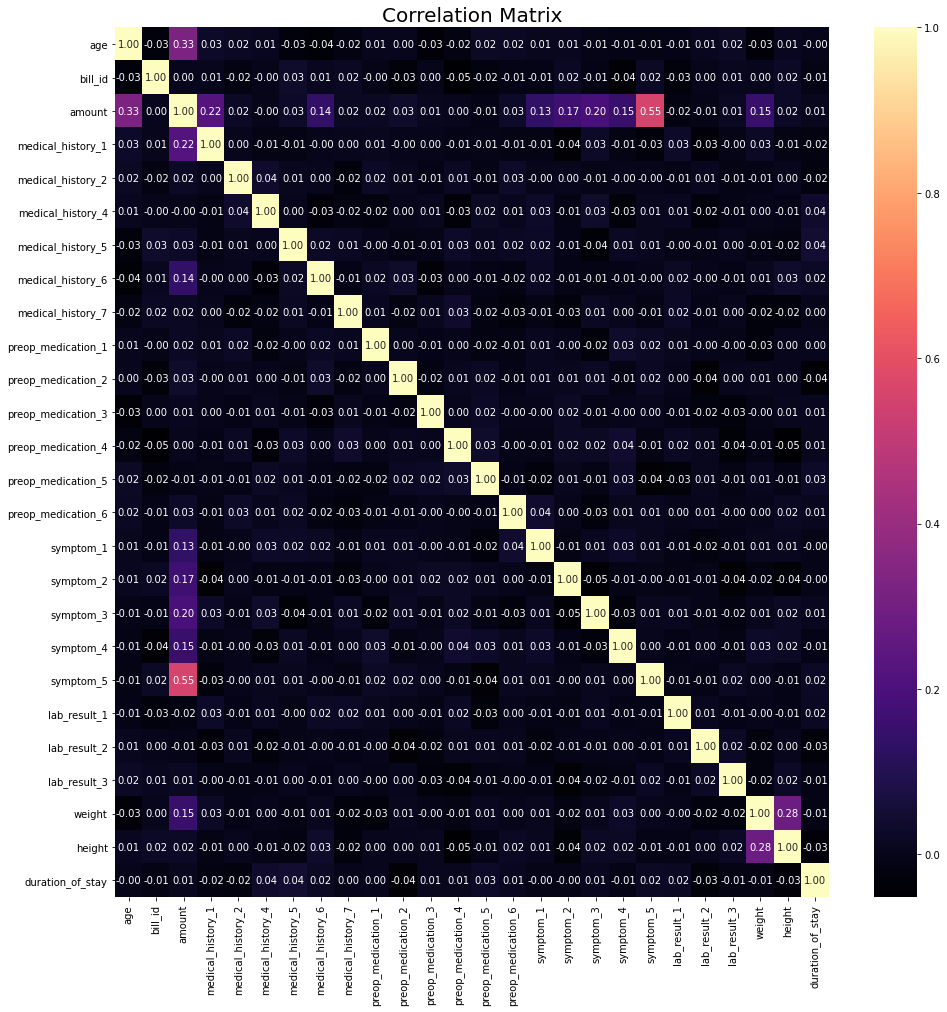

In [108]:
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(df_all2.corr(), annot=True, fmt=".2f", ax=ax1, cmap = "magma" )
ax1.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [109]:
# list the best correlations with value > 0.1
top_correlations = df_all2.corr()
top_feature_columns = top_correlations['amount'][top_correlations['amount'].values > 0.1].index.values
top_feature_columns

array(['age', 'amount', 'medical_history_1', 'medical_history_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'weight'], dtype=object)

In [110]:
fig=px.box(df_all2, x="symptom_5", y="amount", title='Symptom 5 vs Amount', hover_data=['patient_id'])
fig.show() 

In [111]:
fig=px.box(df_all2, x="medical_history_1", y="amount", title='Medical_history_1 vs Amount', hover_data=['patient_id'])
fig.show() 

In [112]:
fig=px.box(df_all2, x="gender", y="amount", title='Gender vs Amount', hover_data=['patient_id'])
fig.show() 

In [113]:
fig=px.box(df_all2, x="race", y="amount", title='Race vs Amount', hover_data=['patient_id'])
fig.show() 

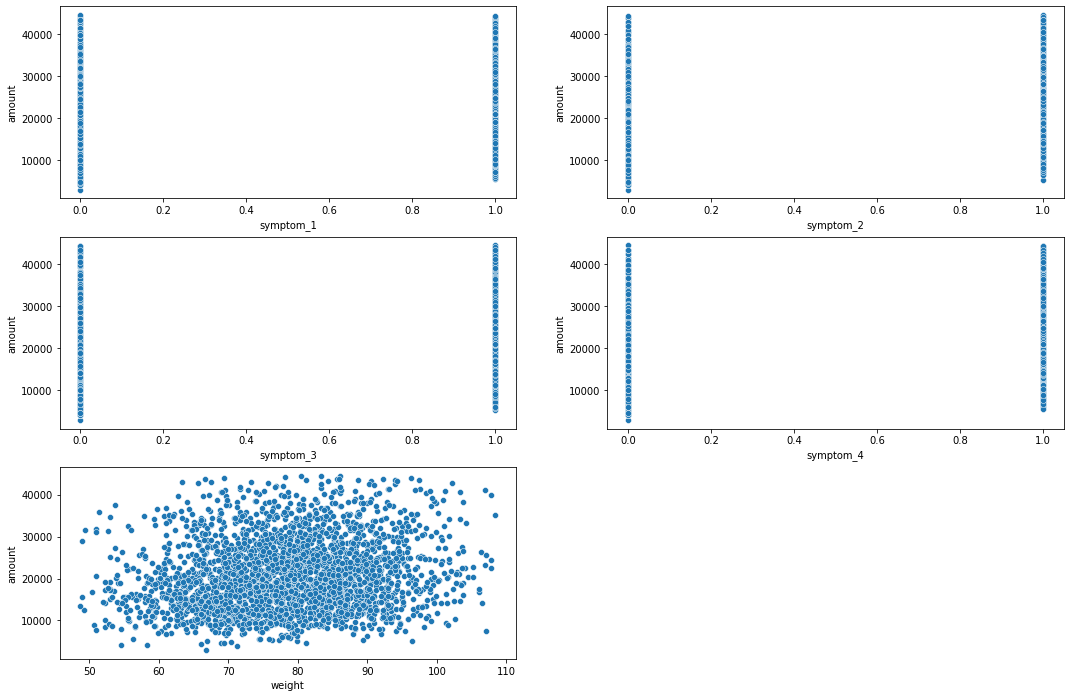

In [114]:
count=1
#col list
list = ["symptom_1","symptom_2","symptom_3","symptom_4","weight"]
plt.subplots(figsize=(18, 12))
for i in list:
    plt.subplot(3,2,count)
    sns.scatterplot(y=df_all2["amount"],x=df_all2[i])
    count+=1

plt.show()

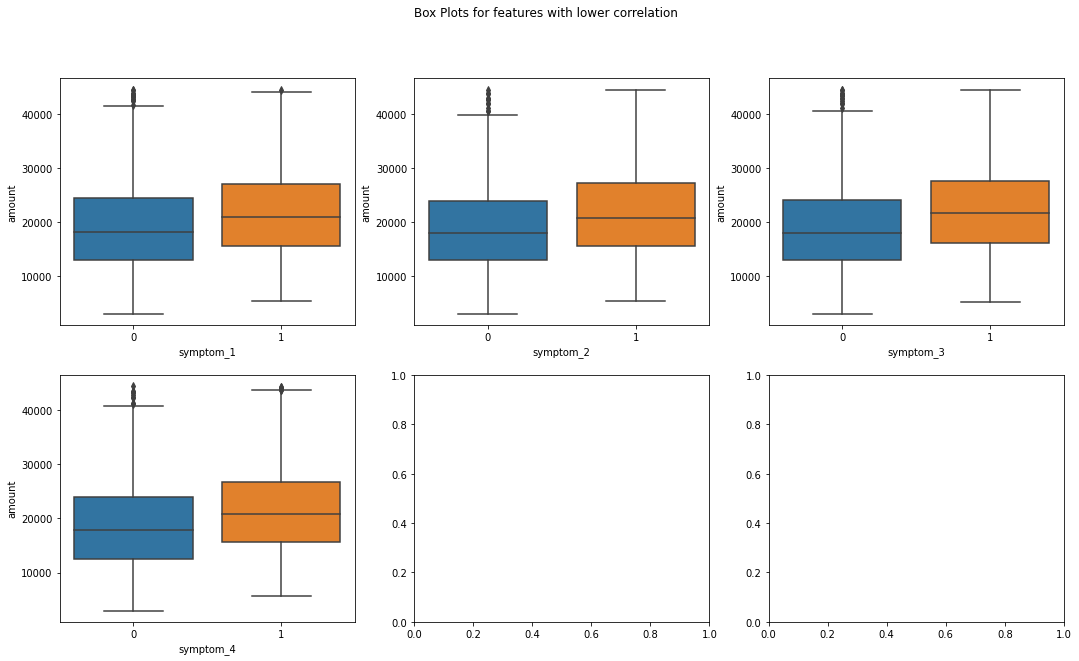

In [115]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
  
fig.suptitle('Box Plots for features with lower correlation')
sns.boxplot(ax=axes[0, 0], data=df_all2, x='symptom_1', y='amount')
sns.boxplot(ax=axes[0, 1], data=df_all2, x='symptom_2', y='amount')
sns.boxplot(ax=axes[0, 2], data=df_all2, x='symptom_3', y='amount')
sns.boxplot(ax=axes[1, 0], data=df_all2, x='symptom_4', y='amount')